![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
39994,id_5230,Paris,['French'],5231.0,$$ - $$$,40.0,"[['Nice little tea and cake', 'Heavenly Chocol...",/Restaurant_Review-g187147-d1931329-Reviews-La...,d1931329,1,4.5
38991,id_9,Warsaw,"['Italian', 'Mediterranean', 'European', 'Vege...",10.0,$$ - $$$,277.0,"[['Buonissimo!', 'A tasteful Italian restauran...",/Restaurant_Review-g274856-d10316860-Reviews-C...,d10316860,1,4.5
47734,id_2258,Lisbon,"['European', 'Portuguese']",2261.0,$,11.0,"[['Nice Bar in Centre of Lisbon', 'Good servic...",/Restaurant_Review-g189158-d10372787-Reviews-M...,d10372787,1,4.0
30132,id_259,Lisbon,"['Mediterranean', 'European', 'Fusion', 'Portu...",260.0,$$ - $$$,503.0,"[['cosy place to take tapas', 'Very friendly p...",/Restaurant_Review-g189158-d1889887-Reviews-Ta...,d1889887,1,4.0
8514,id_8514,Amsterdam,"['Indian', 'Vegetarian Friendly']",3080.0,$,17.0,"[['Very nice Food', 'Nice Indian food !!'], ['...",/Restaurant_Review-g188590-d8670165-Reviews-Sh...,d8670165,0,0.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [15]:
# Для примера я возьму столбец Number of Reviews
def preproc_number_of_reviews(df):
    # Вынесем информацию о наличии пропуска как отдельный признак
    df['Number_of_Reviews_isNAN'] = pd.isna(df['Number of Reviews']).astype('uint8')
    # Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
    df['Number of Reviews'].fillna(0, inplace=True)
    return df

data = preproc_number_of_reviews(data)

In [16]:
data['Number_of_Reviews_isNAN'].value_counts()

0    46800
1     3200
Name: Number_of_Reviews_isNAN, dtype: int64

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [17]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [18]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
def preproc_cities(df):
    df = pd.get_dummies(df, columns=[ 'City',], dummy_na=True)
    return df
data = preproc_cities(data)

In [19]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
24016,id_6328,['Mediterranean'],6329.0,$$ - $$$,17.0,[['Friendly space with nice cocktails and tap....,/Restaurant_Review-g187497-d8665114-Reviews-Di...,d8665114,1,4.0,...,0,0,0,0,0,0,0,0,0,0
40351,id_5330,NaN,5332.0,NaN,6.0,"[[], []]",/Restaurant_Review-g187791-d12058526-Reviews-B...,d12058526,1,4.5,...,0,0,0,0,1,0,0,0,0,0
1284,id_1284,"['Asian', 'Indian', 'Nepali']",1224.0,$$ - $$$,23.0,"[['Most horrible service in my life', 'Saved o...",/Restaurant_Review-g274887-d4701680-Reviews-Ma...,d4701680,0,0.0,...,0,0,0,0,0,0,0,0,0,0
26133,id_2573,['Fusion'],2575.0,$$ - $$$,41.0,"[['As Good As Last Time', 'Great little find']...",/Restaurant_Review-g187514-d8707459-Reviews-Me...,d8707459,1,4.0,...,0,0,0,0,0,0,0,0,0,0
19247,id_11451,"['Chinese', 'Vietnamese']",11453.0,$,6.0,"[['In between', 'Excellent Choice'], ['07/11/2...",/Restaurant_Review-g187147-d7598013-Reviews-Do...,d7598013,1,4.0,...,0,0,1,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [20]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [21]:
def preproc_price_range(df):
    # Заменим категориальный признак числами
    df['Price Range'].replace(to_replace={ '$': 1, '$$ - $$$': 2, '$$$$': 3}, inplace=True)
    # Сохраним данные о записях, где не был указан уровень цен.
    df['Price_Range_isNAN'] = pd.isna(df['Price Range']).astype('uint8')
    # Заполним пропуски, пока что воспользуемся просто медианой.
    df['Price Range'].fillna(df['Price Range'].median(), inplace=True)
    return df

data = preproc_price_range(data)

In [22]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan,Price_Range_isNAN
1763,id_1763,"['Brew Pub', 'Pub']",1380.0,2.0,23.0,"[[], []]",/Restaurant_Review-g187849-d12051353-Reviews-T...,d12051353,0,0.0,...,0,0,0,0,0,0,0,0,0,1
18706,id_6168,NaN,6172.0,2.0,15.0,"[['No icecream served'], ['11/13/2017']]",/Restaurant_Review-g187849-d8339597-Reviews-Mc...,d8339597,1,2.0,...,0,0,0,0,0,0,0,0,0,1
34289,id_4792,NaN,4793.0,2.0,34.0,"[['Take away noodles: great!'], ['10/10/2015']]",/Restaurant_Review-g187147-d8547155-Reviews-Ma...,d8547155,1,4.0,...,0,1,0,0,0,0,0,0,0,1
7816,id_7816,['International'],2296.0,2.0,7.0,"[['Worst experience in Buda', 'Quick breakfast...",/Restaurant_Review-g274887-d8309618-Reviews-Po...,d8309618,0,0.0,...,0,0,0,0,0,0,0,0,0,1
23744,id_3545,['Spanish'],3547.0,2.0,11.0,"[['Nice and cozy', 'Nice tapas bar - if you ca...",/Restaurant_Review-g187514-d3240362-Reviews-Or...,d3240362,1,4.5,...,0,0,0,0,0,0,0,0,0,1


> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

#### Возьмем следующий признак "Cuisine Style".

Для начала добавим к записям признак с колличеством представленых типов кухонь. Если в данных отсутствует информация о типах кухонь, то считаем, что в этом ресторане предлагается только один тип кухни. Так же пометим записи, где не укзан тип кухни.

In [23]:
def string_to_list(s):
    return s[1:-1].replace("'", "").split(', ')

def count_styles(s):
    return len(string_to_list(s)) if s is not np.nan else 1

def get_cuisines_list(df):
    cuisines = set()
    for cuisine in df['Cuisine Style'].dropna().values:
        cuisines.update(string_to_list(cuisine))
    return cuisines

def update_cuisines_rating(cuisine_styles, cuisines_ratings):
        for style in cuisine_styles:
            cuisines_ratings[style] = cuisines_ratings[style] + 1

def calc_cuisines_ratings(df, cuisines):
    cuisines_ratings = {}
    for cuisine in cuisines:
        cuisines_ratings[cuisine] = 0
    
    for cuisine in df['Cuisine Style'].dropna().values:
        update_cuisines_rating(string_to_list(cuisine), cuisines_ratings)
    
    return cuisines_ratings

def preproc_cuisine_style(df):
    # добавим к записям признак с колличеством представленых типов кухонь
    df['Cuisine Style Count'] = df['Cuisine Style'].apply(count_styles)
    # пометим записи, где не укзан тип кухни.
    df['Cuisine_Style_isNAN'] = pd.isna(df['Cuisine Style']).astype('uint8')

    # отдельными признаками добавим типы кухни, которые представлены хотя бы в 1% ресторанов.
    # соберем список всех кухонь представленых в датасете.
    cuisines_list = get_cuisines_list(df)

    # соберем данные о том, в скольки ресторанах представлена каждая кухня.
    cuisines_rating = calc_cuisines_ratings(df, cuisines_list)

    # выделим две группы кухонь те которые представлены хотя бы в 1% ресторанов и остальные
    top_cuisines = []
    low_cuisines = []
    for cuisine in cuisines_rating:
        if cuisines_rating[cuisine] > len(data) * .01:
            top_cuisines.append(cuisine)
        else:
            low_cuisines.append(cuisine)

    # создадим отдельные признаки для кухонь представленых хотя бы в 1%
    def top_cuisine_present(x):
        if pd.isna(x): 
            return 0
        return 1 if cuisine in x else 0

    for cuisine in top_cuisines:
        dummy = df['Cuisine Style'].apply(top_cuisine_present)
        df['Cuisine_' + cuisine] = dummy

    # для остальных добавим признак Cuisine_Other
    def is_low_cuisine_present(x):
        if pd.isna(x): 
            return 0
        for cuisine in low_cuisines:
            if cuisine in x:
                return 1
        return 0

    df['Cuisine_Other'] = df['Cuisine Style'].apply(is_low_cuisine_present)
    return df

data = preproc_cuisine_style(data)

In [24]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Cuisine_Japanese,Cuisine_Vegetarian Friendly,Cuisine_American,Cuisine_Eastern European,Cuisine_Fusion,Cuisine_Central European,Cuisine_Portuguese,Cuisine_British,Cuisine_Turkish,Cuisine_Other
39106,id_4513,"['Italian', 'Seafood', 'Mediterranean']",4514.0,2.0,5.0,"[[], []]",/Restaurant_Review-g187791-d13229566-Reviews-C...,d13229566,1,4.5,...,0,0,0,0,0,0,0,0,0,0
19526,id_8483,['French'],8485.0,3.0,2.0,[['Causy restraunt with nice food and attenti....,/Restaurant_Review-g187147-d982718-Reviews-Les...,d982718,1,4.5,...,0,0,0,0,0,0,0,0,0,0
14762,id_3678,NaN,3679.0,2.0,10.0,"[['Halal Turkish Kebab Shop and Cafe'], ['10/2...",/Restaurant_Review-g187791-d11749959-Reviews-C...,d11749959,1,5.0,...,0,0,0,0,0,0,0,0,0,0
32155,id_1689,NaN,1690.0,2.0,23.0,"[['Bad service', 'Best sushi in Brussels'], ['...",/Restaurant_Review-g188644-d11945896-Reviews-T...,d11945896,1,4.0,...,0,0,0,0,0,0,0,0,0,0
28005,id_2313,NaN,2317.0,2.0,6.0,[['4 star food on a 5 star location a sunny w....,/Restaurant_Review-g189852-d8420455-Reviews-Ba...,d8420455,1,2.5,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Reviews".

Добавим признаки с датами последнего и предпоследнего отзывов, а также колличество дней между ними.

In [25]:
def get_dates_list(x):
    dates = x.split('], [')[1]
    dates = dates[:-2]
    dates = dates.replace("'", "")
    return dates.split(', ')

def get_penultimate_review(x):
    dates = get_dates_list(x)
    return pd.to_datetime(dates[-1]) if len(dates) >= 1 else np.NaN

def get_last_review(x):
    dates = get_dates_list(x)
    return pd.to_datetime(dates[0]) if len(dates) >= 1 else np.NaN

def preproc_reviews(df):
    # заполним пропуски пустыми значениями
    df['Reviews'].fillna('[[], []]', inplace=True)

    # отметим записи коментарии в которых отсутствуют
    df['Reviews_NA'] = (df['Reviews'] == '[[], []]').astype(int)

    # создадим признаки с датами двух последних коментариев
    df['Penultimate_Review'] = df['Reviews'].apply(lambda x: get_penultimate_review(x))
    df['Last_Review'] = df['Reviews'].apply(lambda x: get_last_review(x))

    # создадим признак количеством дней прошедшими между двумя последними коментариями
    df = df.assign(Review_Time_Delta = lambda x: (x['Last_Review'] - x['Penultimate_Review']).dt.days)

    # звполним пустые записи
    df['Review_Time_Delta'] = df['Review_Time_Delta'].fillna(0)
    return df

data = preproc_reviews(data)

In [26]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,Cuisine_Fusion,Cuisine_Central European,Cuisine_Portuguese,Cuisine_British,Cuisine_Turkish,Cuisine_Other,Reviews_NA,Penultimate_Review,Last_Review,Review_Time_Delta
43335,id_4828,"['Japanese', 'Sushi']",4829.0,2.0,59.0,"[['Good food - Great customer service', 'Good,...",/Restaurant_Review-g187147-d1333165-Reviews-Re...,d1333165,1,4.0,...,0,0,0,0,0,0,0,2015-07-20,2017-07-23,734.0
30902,id_2112,NaN,2114.0,2.0,2.0,"[[], []]",/Restaurant_Review-g190454-d5976443-Reviews-Ca...,d5976443,1,4.5,...,0,0,0,0,0,0,1,NaT,NaT,0.0
49784,id_784,"['Italian', 'Bar', 'Mediterranean', 'European'...",785.0,2.0,332.0,[['Funky happy little place with very positiv....,/Restaurant_Review-g187791-d2461813-Reviews-Il...,d2461813,1,4.5,...,0,0,0,0,0,1,0,2017-06-27,2017-09-18,83.0
37640,id_265,"['Steakhouse', 'Belgian', 'Bar', 'Barbecue', '...",266.0,2.0,836.0,"[['Decent-ish food in a restaurant desert', 'G...",/Restaurant_Review-g188644-d8512594-Reviews-Br...,d8512594,1,3.5,...,0,0,0,0,0,1,0,2018-02-24,2018-02-24,0.0
23818,id_1907,['Russian'],1908.0,2.0,0.0,"[[], []]",/Restaurant_Review-g274887-d3974430-Reviews-Ar...,d3974430,1,4.0,...,0,0,0,0,0,1,1,NaT,NaT,0.0


# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

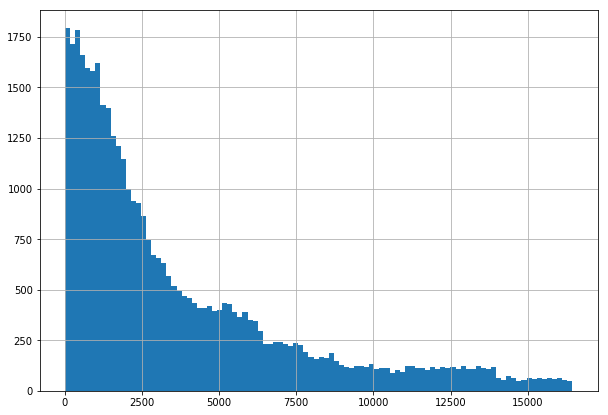

In [27]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

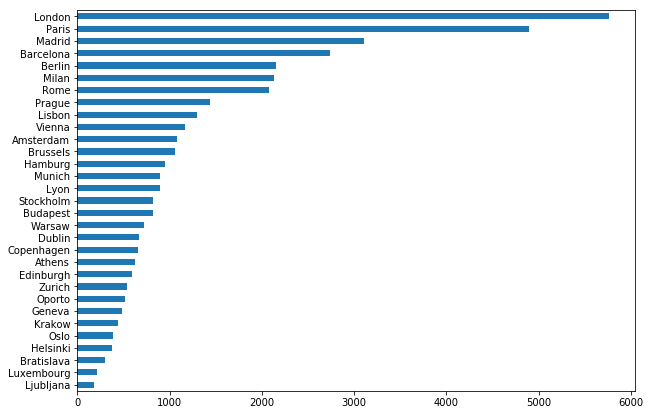

In [28]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

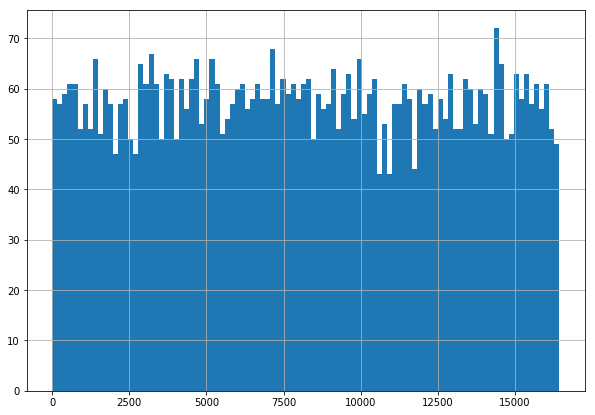

In [29]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

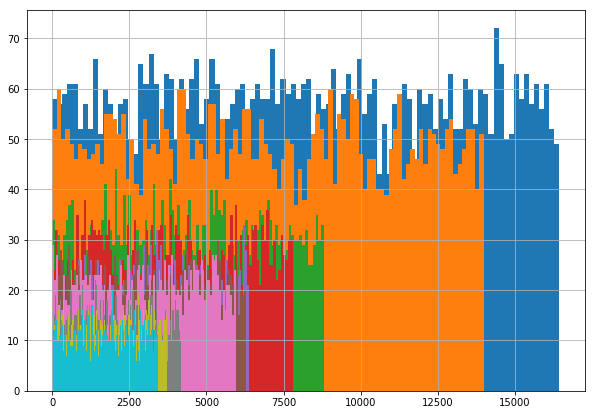

In [30]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

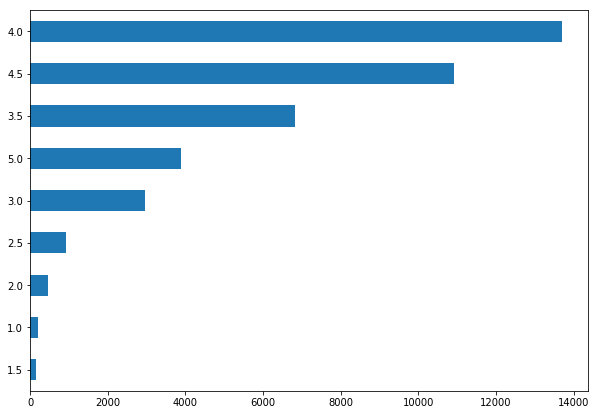

In [31]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

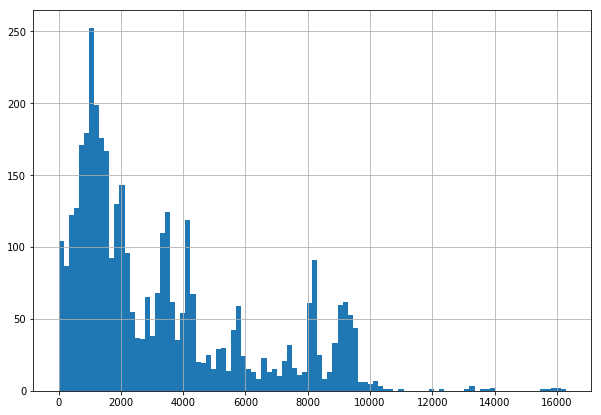

In [32]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

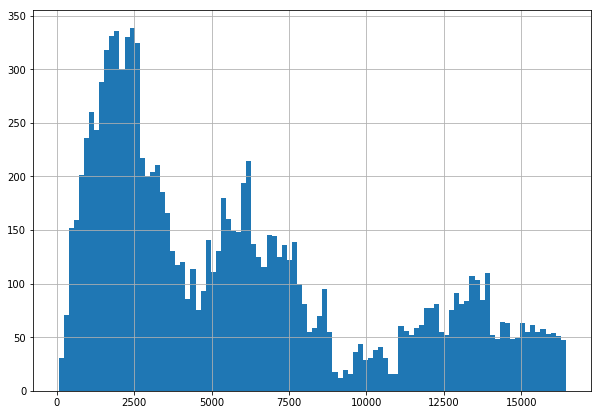

In [33]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

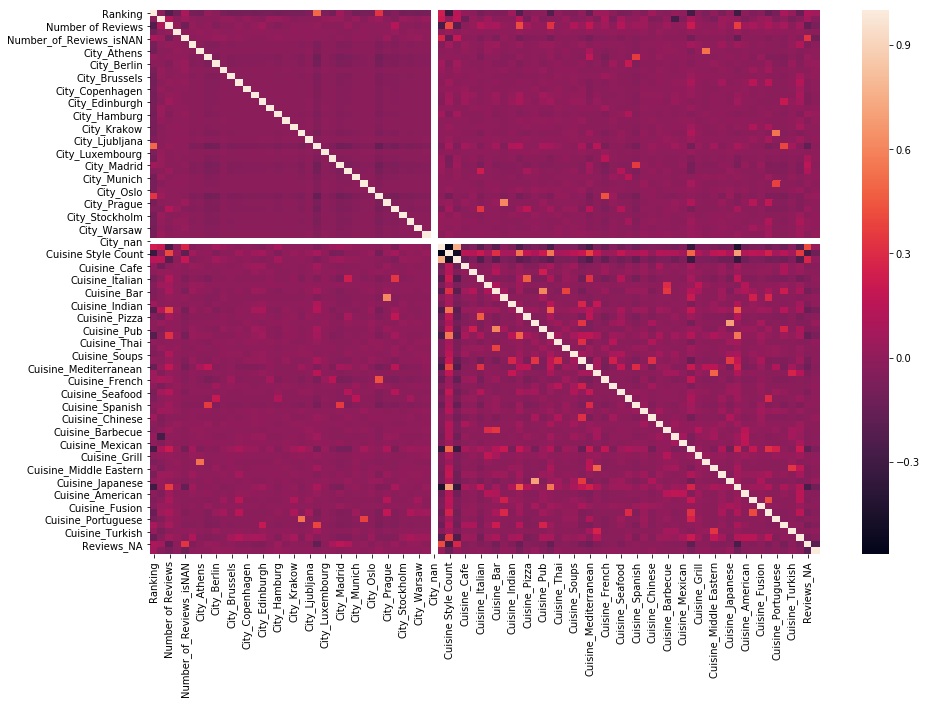

In [34]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [35]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [36]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд... 
    df_output = preproc_number_of_reviews(df_output)
    # тут ваш код по обработке NAN    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = preproc_cities(df_output)
    # тут ваш код не Encoding фитчей
    
    df_output = preproc_price_range(df_output)
    df_output = preproc_cuisine_style(df_output)
    df_output = preproc_reviews(df_output)
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    # object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    # df_output.drop(object_columns, axis = 1, inplace=True)

    object_cols = list(df_output.select_dtypes(include=['object', 'datetime64[ns]', 'timedelta64[ns]']).columns)
    df_output = df_output.drop(labels=object_cols, axis=1)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [37]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,...,Cuisine_American,Cuisine_Eastern European,Cuisine_Fusion,Cuisine_Central European,Cuisine_Portuguese,Cuisine_British,Cuisine_Turkish,Cuisine_Other,Reviews_NA,Review_Time_Delta
6750,9110.0,2.0,25.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,-6.0
25645,1361.0,1.0,34.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,28.0
20679,311.0,1.0,140.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,129.0
48208,7178.0,1.0,20.0,1,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,103.0
45466,13567.0,2.0,4.0,1,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.0
23399,1985.0,2.0,0.0,1,5.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
27215,3605.0,2.0,31.0,1,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,222.0
48397,2057.0,1.0,227.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.0
22585,152.0,3.0,20.0,1,5.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.0
13364,2796.0,2.0,26.0,1,3.5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,119.0


In [38]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 87 columns):
Ranking                        50000 non-null float64
Price Range                    50000 non-null float64
Number of Reviews              50000 non-null float64
sample                         50000 non-null int64
Rating                         50000 non-null float64
Number_of_Reviews_isNAN        50000 non-null uint8
City_Amsterdam                 50000 non-null uint8
City_Athens                    50000 non-null uint8
City_Barcelona                 50000 non-null uint8
City_Berlin                    50000 non-null uint8
City_Bratislava                50000 non-null uint8
City_Brussels                  50000 non-null uint8
City_Budapest                  50000 non-null uint8
City_Copenhagen                50000 non-null uint8
City_Dublin                    50000 non-null uint8
City_Edinburgh                 50000 non-null uint8
City_Geneva                    50000 non-null uint8

Нормализуем датасет

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled = scaler.fit_transform(df_preproc)
scaled_df = pd.DataFrame(scaled)
scaled_df.columns = df_preproc.columns

scaled_df['Rating'] = df_preproc['Rating']

df_preproc = scaled_df

In [40]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [41]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [42]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 86), (40000, 86), (40000, 85), (32000, 85), (8000, 85))

# Model 
Сам ML

In [43]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [44]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [45]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [46]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.20906625


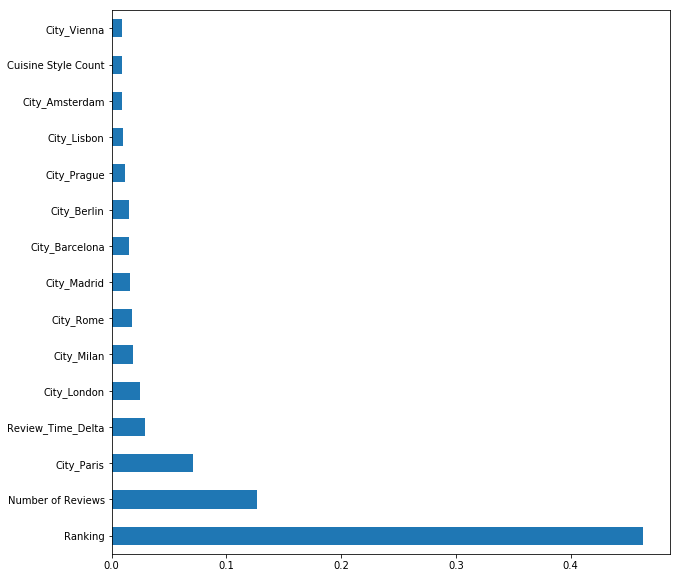

In [47]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [48]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Number_of_Reviews_isNAN,City_Amsterdam,City_Athens,City_Barcelona,City_Berlin,City_Bratislava,...,Cuisine_American,Cuisine_Eastern European,Cuisine_Fusion,Cuisine_Central European,Cuisine_Portuguese,Cuisine_British,Cuisine_Turkish,Cuisine_Other,Reviews_NA,Review_Time_Delta
6458,0.039348,0.5,0.003830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145708
3542,0.003588,0.0,0.009006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.112903
4419,0.080703,0.5,0.000207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.098961
9086,0.015447,1.0,0.025466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.124112
7250,0.063249,0.5,0.019255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.114543
7968,0.100347,0.5,0.003934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098961
7878,0.666423,0.5,0.000207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.104429
1784,0.114699,0.0,0.007453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.108256
5754,0.035699,0.0,0.006315,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.099508
8598,0.251596,0.0,0.001035,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.098961


In [49]:
test_data = test_data.drop(['Rating'], axis=1)

In [50]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [51]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [52]:
predict_submission

array([3.005, 4.335, 4.45 , ..., 3.01 , 4.49 , 4.275])

In [53]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.005
1,id_1,4.335
2,id_2,4.450
3,id_3,4.385
4,id_4,4.495
5,id_5,4.460
6,id_6,2.395
7,id_7,2.715
8,id_8,4.080
9,id_9,4.695


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
